In [1]:
import pandas as pd

df = pd.read_parquet("pns_filtrada.parquet").copy()
df

,P00601,P00602,P00604,P00605,P01101,P013,P015,P00612,P023,P02401,...,Q067,Q00401,Q00502,Q00503,Q00601,Q00602,V0001,V0031,Q003,Q064
0,1,1,1,2,3.0,6.0,3.0,1,7.0,2,...,NA,1,NA,1,1,NA,11,1,46.0,NaN
1,1,2,1,2,4.0,2.0,0.0,2,0.0,NA,...,NA,NA,NA,NA,NA,NA,11,1,NaN,NaN
2,1,2,1,2,7.0,0.0,3.0,1,0.0,NA,...,NA,NA,NA,NA,NA,NA,11,1,NaN,NaN
3,1,2,1,1,7.0,3.0,3.0,1,0.0,NA,...,NA,NA,NA,NA,NA,NA,11,1,NaN,NaN
4,1,2,2,1,3.0,2.0,1.0,2,7.0,2,...,NA,NA,NA,NA,NA,NA,11,1,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87026,1,2,1,2,3.0,2.0,0.0,2,0.0,NA,...,NA,NA,NA,NA,NA,NA,53,1,NaN,NaN
87027,1,1,1,2,7.0,7.0,2.0,2,0.0,NA,...,NA,NA,NA,NA,NA,NA,53,1,NaN,NaN
87028,1,1,1,2,6.0,0.0,0.0,1,7.0,2,...,NA,NA,NA,NA,NA,NA,53,1,NaN,NaN
87029,1,2,1,1,3.0,3.0,0.0,1,0.0,NA,...,NA,NA,NA,NA,NA,NA,53,1,NaN,NaN


In [2]:
import numpy as np

# Substituir 'NA' por NaN
df = df.replace('NA', np.nan)

# Converter para numérico
df['Q003'] = pd.to_numeric(df['Q003'], errors='coerce')

# Criar faixas etárias (não precisa converter para inteiro)
bins = [0, 10, 20, 30, 40, 50, 60, 70, np.inf]
labels = ['0-10', '10-20', '20-30', '30-40', '40-50', '50-60', '60-70', '70+']
df['faixa_et_diag_hip'] = pd.cut(df['Q003'], bins=bins, labels=labels, right=False)
df_idades_hip = df[df['Q00201'] == '1'].reset_index(drop=True)

df_idades_hip

,P00601,P00602,P00604,P00605,P01101,P013,P015,P00612,P023,P02401,...,Q00401,Q00502,Q00503,Q00601,Q00602,V0001,V0031,Q003,Q064,faixa_et_diag_hip
0,1,1,1,2,3.0,6.0,3.0,1,7.0,2,...,1,NaN,1,1,NaN,11,1,46.0,NaN,40-50
1,1,1,1,1,7.0,7.0,0.0,1,7.0,2,...,2,4,1,2,6,11,1,62.0,NaN,60-70
2,1,1,1,2,3.0,0.0,2.0,1,7.0,2,...,2,4,1,1,NaN,11,1,65.0,NaN,60-70
3,1,2,1,2,2.0,4.0,2.0,1,7.0,1,...,2,2,1,1,NaN,11,1,50.0,NaN,50-60
4,1,2,1,2,5.0,0.0,2.0,1,2.0,2,...,2,4,1,3,7,11,1,68.0,NaN,60-70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23846,1,2,1,2,2.0,5.0,0.0,1,7.0,1,...,3,10,1,3,7,53,1,12.0,NaN,10-20
23847,1,2,1,2,2.0,2.0,0.0,2,0.0,NaN,...,2,4,1,1,NaN,53,1,19.0,37.0,10-20
23848,1,2,2,1,0.0,2.0,2.0,2,0.0,NaN,...,1,NaN,1,1,NaN,53,1,54.0,54.0,50-60
23849,1,2,1,1,2.0,3.0,1.0,1,7.0,2,...,1,NaN,1,1,NaN,53,1,45.0,NaN,40-50


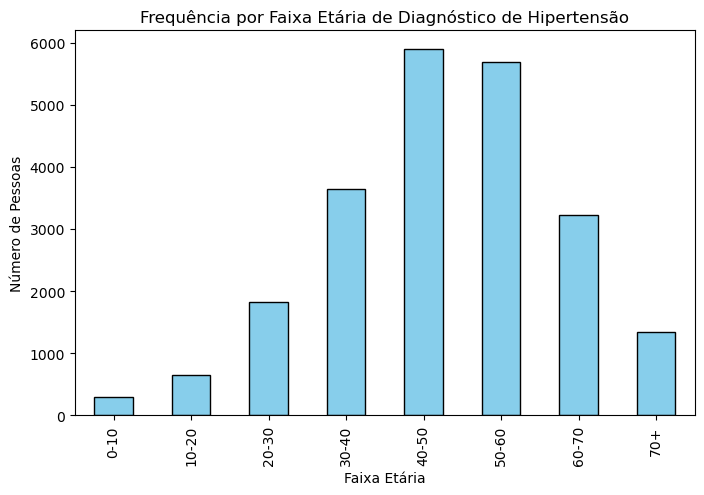

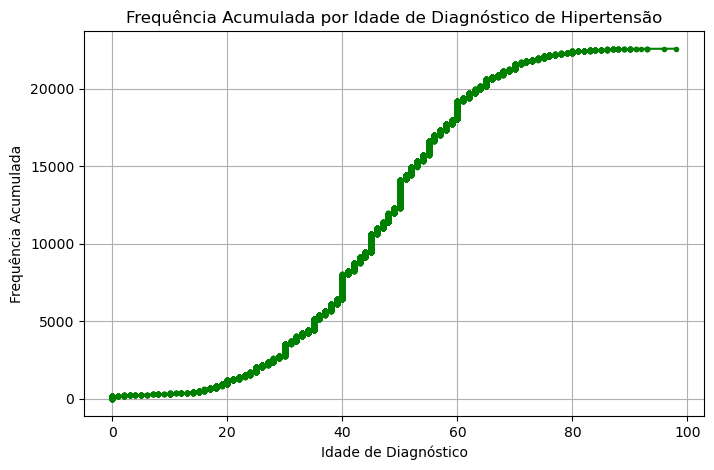

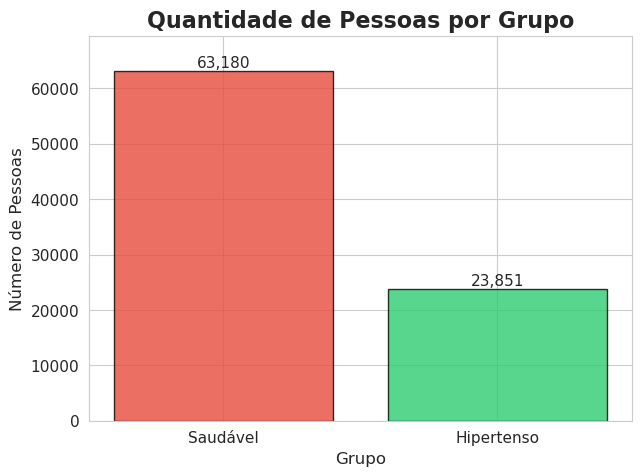

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# --- Gráfico de frequência por faixa etária ---
frequencia = df_idades_hip['faixa_et_diag_hip'].value_counts().sort_index()

plt.figure(figsize=(8,5))
frequencia.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Frequência por Faixa Etária de Diagnóstico de Hipertensão')
plt.xlabel('Faixa Etária')
plt.ylabel('Número de Pessoas')

# salvar
plt.savefig("/home/ettore/Documentos/PUC/DataMining/Artefatos/frequencia_faixa_etaria.png", 
            dpi=300, bbox_inches="tight")
plt.show()


# --- Gráfico de frequência acumulada ---
idades = df_idades_hip['Q003'].dropna().sort_values()
freq_acum = np.arange(1, len(idades)+1)

plt.figure(figsize=(8,5))
plt.plot(idades, freq_acum, marker='.', linestyle='-', color='green')
plt.title('Frequência Acumulada por Idade de Diagnóstico de Hipertensão')
plt.xlabel('Idade de Diagnóstico')
plt.ylabel('Frequência Acumulada')
plt.grid(True)

# salvar
plt.savefig("/home/ettore/Documentos/PUC/DataMining/Artefatos/frequencia_acumulada.png", 
            dpi=300, bbox_inches="tight")
plt.show()


# --- Gráfico de comparação Hipertensos vs Saudáveis ---
sns.set_style("whitegrid")
df['hipertensao'] = df['Q00201'].apply(lambda x: 'Hipertenso' if x == '1' else 'Saudável')
contagem = df['hipertensao'].value_counts()

plt.figure(figsize=(7,5))
colors = ['#e74c3c', '#2ecc71']
bars = plt.bar(contagem.index, contagem.values, color=colors, edgecolor='black', alpha=0.8)

for bar in bars:
    altura = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, altura + 50, f'{altura:,}', 
             ha='center', va='bottom', fontsize=11)

plt.title('Quantidade de Pessoas por Grupo', fontsize=16, weight='bold')
plt.ylabel('Número de Pessoas', fontsize=12)
plt.xlabel('Grupo', fontsize=12)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.ylim(0, max(contagem.values)*1.1)

# salvar
plt.savefig("/home/ettore/Documentos/PUC/DataMining/Artefatos/hipertensos_vs_saudaveis.png", 
            dpi=300, bbox_inches="tight")
plt.show()


In [4]:
def converter_numerico(data, coluna):
    data[coluna] = pd.to_numeric(data[coluna], errors='coerce')

cols = [
    "P01101", "P013", "P015", "P023", "P00901",
    "P018", "P019", "P02001", "P02002", "P035", "P03701",
    "P029", "P03702", "Q003", "Q064", "P02801"
]

for col in cols:
    if col in df_idades_hip.columns:
        converter_numerico(df_idades_hip, col)
df_idades_hip

,P00601,P00602,P00604,P00605,P01101,P013,P015,P00612,P023,P02401,...,Q00401,Q00502,Q00503,Q00601,Q00602,V0001,V0031,Q003,Q064,faixa_et_diag_hip
0,1,1,1,2,3.0,6.0,3.0,1,7.0,2,...,1,NaN,1,1,NaN,11,1,46.0,NaN,40-50
1,1,1,1,1,7.0,7.0,0.0,1,7.0,2,...,2,4,1,2,6,11,1,62.0,NaN,60-70
2,1,1,1,2,3.0,0.0,2.0,1,7.0,2,...,2,4,1,1,NaN,11,1,65.0,NaN,60-70
3,1,2,1,2,2.0,4.0,2.0,1,7.0,1,...,2,2,1,1,NaN,11,1,50.0,NaN,50-60
4,1,2,1,2,5.0,0.0,2.0,1,2.0,2,...,2,4,1,3,7,11,1,68.0,NaN,60-70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23846,1,2,1,2,2.0,5.0,0.0,1,7.0,1,...,3,10,1,3,7,53,1,12.0,NaN,10-20
23847,1,2,1,2,2.0,2.0,0.0,2,0.0,NaN,...,2,4,1,1,NaN,53,1,19.0,37.0,10-20
23848,1,2,2,1,0.0,2.0,2.0,2,0.0,NaN,...,1,NaN,1,1,NaN,53,1,54.0,54.0,50-60
23849,1,2,1,1,2.0,3.0,1.0,1,7.0,2,...,1,NaN,1,1,NaN,53,1,45.0,NaN,40-50


In [5]:
print(df['P02401'].isna().sum())
df['P02401'].describe()

26449


count     60582
unique        3
top           2
freq      48797
Name: P02401, dtype: object

In [6]:
def gerar_resumo(df, nome_arquivo='resumo_dados.txt'):
    # Separa tipos de colunas
    numericas = df.select_dtypes(include=["number"]).columns
    categoricas = df.select_dtypes(exclude=["number"]).columns
    
    total_rows = len(df) # <-- NOVO: Pega o total de linhas para calcular percentual

    with open(nome_arquivo, 'w', encoding='utf-8') as f:
        f.write("===== RESUMO ESTATÍSTICO =====\n")
        f.write(f"Total de Linhas no DataFrame: {total_rows}\n\n") # <-- NOVO

        # --- Colunas numéricas ---
        f.write("### Colunas Numéricas ###\n\n")
        for col in numericas:
            f.write(f"Coluna: {col}\n")
            
            # --- Bloco Adicionado ---
            nulos = df[col].isna().sum()
            perc_nulos = (nulos / total_rows) * 100
            f.write(f"Valores Nulos: {nulos} ({perc_nulos:.2f}%)\n")
            # --- Fim do Bloco ---
            
            descr = df[col].describe()
            f.write(descr.to_string())
            f.write("\n\n")

        # --- Colunas categóricas ---
        f.write("### Colunas Categóricas ###\n\n")
        for col in categoricas:
            f.write(f"Coluna: {col}\n")
            
            # --- Bloco Adicionado ---
            nulos = df[col].isna().sum()
            perc_nulos = (nulos / total_rows) * 100
            f.write(f"Valores Nulos: {nulos} ({perc_nulos:.2f}%)\n")
            # --- Fim do Bloco ---
            
            descr = df[col].describe()
            f.write(descr.to_string())
            f.write("\n\n")

    print(f"✅ Resumo salvo em: {nome_arquivo}")

gerar_resumo(df_idades_hip)

✅ Resumo salvo em: resumo_dados.txt
